## David Gamaliel Arcos Bravo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import cv2

from sklearn.metrics import confusion_matrix

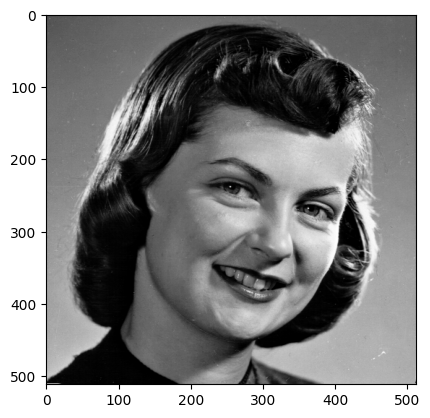

In [2]:
img = cv2.imread('images/GirlFace.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

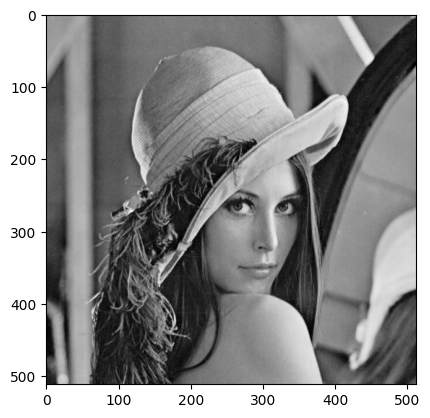

In [3]:
img_lena = cv2.imread('images/Lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_lena, cmap="gray")

### 1.1 Download the Girl Face image and plot a histogram of the grey levels it contains.

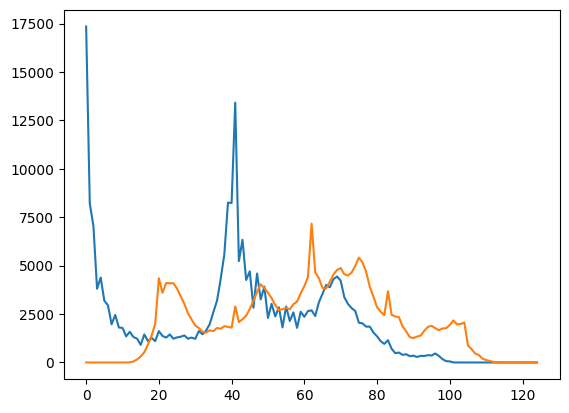

In [4]:
hist = cv2.calcHist([img], [0], None, [125], [0, 256])
plt.plot(hist)
hist = cv2.calcHist([img_lena], [0], None, [125], [0, 256])
plt.plot(hist)

### 1.2 Write a short program to threshold the image and try to identify a good threshold by trial and error. Create a ground truth segmentation.

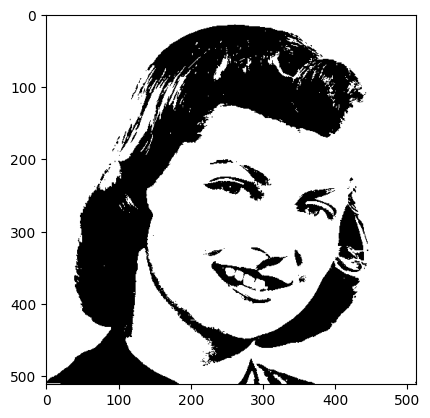

In [5]:
# Ground truth segmentation
segmentation = np.zeros(img.shape)
segmentation[img > 55] = 255
plt.imshow(segmentation, cmap="gray")

### 1.3 Use your ground truth segmentation to plot an ROC curve for your thresholding algorithm.

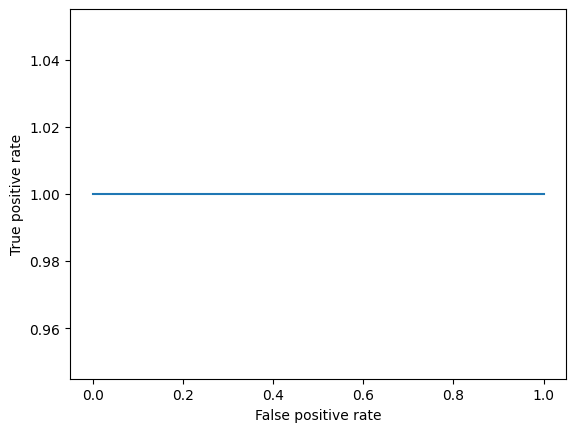

In [6]:
true_positive_rate = []
false_positive_rate = []
y_true = img.flatten()

for i in range(0,256):
    segmentation = np.zeros(img.shape)
    segmentation[img <= i] = 1
    y_pred = segmentation.flatten()
    
    cm = confusion_matrix(y_true, y_pred, labels=[0,1])

    true_positive = cm[1, 1]
    true_negative = cm[0, 0]
    false_positive = cm[0, 1]
    false_negative = cm[1, 0]

    true_positive_rate.append(true_positive / (true_positive + false_negative))
    false_positive_rate.append(false_positive / (false_positive + true_negative))
    
plt.plot(true_positive_rate, false_positive_rate)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

C:\Users\David Arcos\AppData\Local\Temp\ipykernel_14900\604580300.py:22: RuntimeWarning: overflow encountered in ubyte_scalars
  if ((x1+i >= 0) and (x1+i < row) and (y1+j >= 0) and (y1+j < col)) and (np.abs(img1[x1+i,y1+j] - img1[x1,y1]) < 50 and (segmented_img[x1+i,y1+j] != segmented_img[x1,y1])):


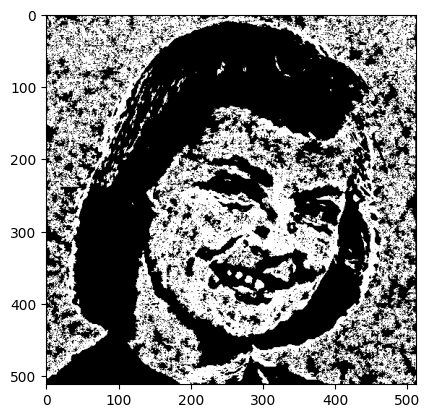

In [7]:
# region growing algorithm
def region_growing(img, seeds):
    img1 = img.copy()
    segmented_img = np.zeros((img1.shape[0],img1.shape[1]),dtype = int)
    row,col = img.shape
    for seed in seeds:
        x,y = seed
        if img1[x,y] < 60:
            continue
        stack = np.zeros((img1.shape[0]*img1.shape[1],2),dtype = int)
        pstack = 0
        stack[pstack][0] = x
        stack[pstack][1] = y
        segmented_img[x][y] = 255
        counter = 1
        while pstack >= 0:
            x1 = stack[pstack][0]
            y1 = stack[pstack][1]
            pstack = pstack - 1
            for i in range(-1,2):
                for j in range(-1,2):
                    if ((x1+i >= 0) and (x1+i < row) and (y1+j >= 0) and (y1+j < col)) and (np.abs(img1[x1+i,y1+j] - img1[x1,y1]) < 50 and (segmented_img[x1+i,y1+j] != segmented_img[x1,y1])):
                        segmented_img[x1+i,y1+j] = 355
                        counter = counter + 1
                        pstack = pstack + 1
                        stack[pstack][0] = x1 + i
                        stack[pstack][1] = y1 + j
    return segmented_img

# Use region growing algorithm to segment the image
seeds = np.random.randint(size=(5000,2),low=0,high=img.shape[0])
segmentation = region_growing(img, seeds)
plt.imshow(segmentation, cmap="gray")

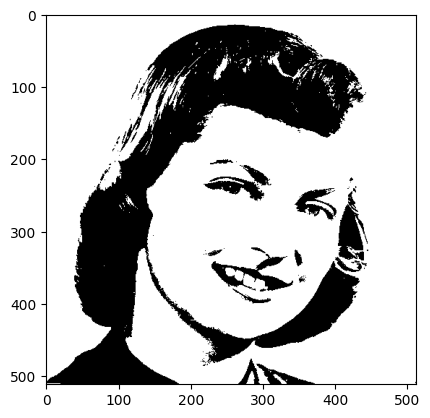

In [8]:
# Mean shift algorithm
def mean_shift(img, seed):
    img_copy = img.copy()
    img_copy[img_copy < seed] = 0
    img_copy[img_copy >= seed] = 1
    img_copy = img_copy.astype(np.uint8)
    return img_copy

# Use mean shift algorithm to segment the image
segmentation = mean_shift(img, seed=55)
plt.imshow(segmentation, cmap="gray")